In [1]:
# Read in data and packages
import pandas as pd
import numpy as np
#import bamboolib as bam

df = pd.read_csv('ML1_data_adj_v3.csv')

In [2]:
df1 = df.drop(columns=['Date', 'ticker', 'Fwd_Return_3M', 'Fwd_Return_3M_Class', 'Year'])
df1.describe()

,Fwd_Best_EPS_6M,Mkt_Cap,Best_EPS_1M,Best_EPS_3M,Best_EPS_6M,Best_EPS_1Y,Best_EPS_3Y,Best_EPS_5Y,Best_EPS_3M_v5Y,Best_EPS_6M_v5Y,...,ROIC_SD,ROE,ROE_1Y_Chg,ROE_SD,FCF_Mgn,FCF_Mgn_1Y_Chg,FCF_Mgn_SD,Op_Mgn,Op_Mgn_1Y_Chg,Op_Mgn_SD
count,66543.000000,6.654300e+04,66543.000000,66543.000000,66543.000000,66543.000000,66543.000000,66543.000000,66543.000000,66543.000000,...,66543.000000,66543.000000,66543.000000,66543.000000,66543.000000,66543.000000,66543.000000,66543.000000,66543.000000,66543.000000
mean,0.146072,3.963934e+04,0.134926,0.149239,0.142226,0.146950,0.175486,0.206988,0.655999,0.628822,...,4.363130,21.455667,0.485937,13.604074,14.862171,0.645832,5.215309,19.793758,0.321828,2.435875
std,0.346498,1.209661e+05,0.641078,0.408113,0.288412,0.225683,0.185265,0.227802,1.830792,1.224266,...,12.324927,20.696550,37.653509,46.717679,16.419273,21.480849,14.647090,13.151157,4.160568,3.073220
min,-0.998682,2.285343e+02,-2.993548,-1.969543,-0.998682,-0.901786,-0.315403,-0.192926,-7.963698,-3.993773,...,0.102878,-34.297030,-1911.423912,0.131123,-186.202847,-786.589581,0.171153,-3.827139,-83.005348,0.040187
25%,-0.008496,4.091980e+03,0.000000,-0.010204,0.000000,0.034915,0.073810,0.087458,0.000000,0.000000,...,1.394105,10.335427,-2.172367,1.977712,5.892424,-1.997974,1.693878,9.792099,-0.869289,0.853625
50%,0.101124,1.074958e+04,0.000000,0.060423,0.097981,0.119841,0.145540,0.158129,0.217910,0.420799,...,2.406145,14.893621,0.407125,3.818095,12.112964,0.596600,2.874146,17.111181,0.163065,1.617410
75%,0.292308,2.820864e+04,0.060302,0.271513,0.263307,0.235416,0.240492,0.266364,1.271802,1.333494,...,4.377073,26.106234,4.261422,8.287664,23.020334,3.405229,4.743748,26.899368,1.543946,3.045869
max,1.993151,2.317310e+06,5.985646,3.970370,1.993151,1.970179,1.985257,1.996078,7.994405,3.997175,...,267.476144,191.928086,184.928481,804.311314,192.327044,473.918884,315.433750,96.975075,67.269338,54.359769


In [3]:
df2 = df1.sample(frac=0.9, random_state=123)
df2_unseen = df1.drop(df2.index)

In [4]:
df2_unseen.describe()

,Fwd_Best_EPS_6M,Mkt_Cap,Best_EPS_1M,Best_EPS_3M,Best_EPS_6M,Best_EPS_1Y,Best_EPS_3Y,Best_EPS_5Y,Best_EPS_3M_v5Y,Best_EPS_6M_v5Y,...,ROIC_SD,ROE,ROE_1Y_Chg,ROE_SD,FCF_Mgn,FCF_Mgn_1Y_Chg,FCF_Mgn_SD,Op_Mgn,Op_Mgn_1Y_Chg,Op_Mgn_SD
count,6654.000000,6.654000e+03,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,...,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000
mean,0.156908,3.875724e+04,0.132562,0.149807,0.142897,0.146926,0.174152,0.208195,0.665810,0.621051,...,4.224374,21.331504,1.154440,13.290853,14.426650,0.549774,4.843307,19.478574,0.342164,2.382597
std,0.353627,1.176074e+05,0.640763,0.411155,0.288691,0.227758,0.185546,0.233675,1.866974,1.229984,...,10.458280,21.014836,30.697354,45.369288,15.094966,18.329883,13.104855,12.858883,4.133951,2.829568
min,-0.997361,2.285343e+02,-2.993548,-1.904762,-0.975421,-0.809935,-0.279805,-0.160181,-7.686221,-3.993373,...,0.107370,-33.754513,-1911.423912,0.152143,-186.066923,-682.186460,0.174305,-3.827139,-83.005348,0.040365
25%,-0.005642,4.028406e+03,0.000000,-0.009266,0.000000,0.036364,0.070813,0.085652,0.000000,0.000000,...,1.411137,10.318431,-2.173408,2.019477,5.744892,-1.988453,1.691447,9.758385,-0.862376,0.863403
50%,0.105586,1.067515e+04,0.000000,0.062500,0.103052,0.119548,0.142650,0.156667,0.227487,0.426198,...,2.413441,14.922765,0.414229,3.903654,11.996881,0.571225,2.860838,16.903563,0.167769,1.611200
75%,0.301870,2.740425e+04,0.065061,0.280367,0.265646,0.236261,0.243391,0.267468,1.296419,1.333373,...,4.429800,25.974281,4.448067,8.307669,22.262243,3.319871,4.679770,26.384996,1.560313,2.978365
max,1.978355,2.241304e+06,5.928058,3.904437,1.993151,1.970179,1.943333,1.987302,7.969040,3.995350,...,266.626684,185.473309,184.928481,803.640188,192.327044,473.918884,268.681811,85.386440,43.631613,46.473281


In [5]:
from pycaret.regression import *

In [6]:
reg_experiment = setup(df2, target = 'Fwd_Best_EPS_6M', session_id=123, log_experiment=True, experiment_name='Fwd_EPS_6M')

,Description,Value
0,session_id,123
1,Target,Fwd_Best_EPS_6M
2,Original Data,"(59889, 70)"
3,Missing Values,False
4,Numeric Features,61
5,Categorical Features,8
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(41922, 92)"


In [7]:
best_model = compare_models(fold=10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0513,0.0124,0.1112,0.8969,0.0709,28.9827,17.6890
rf,Random Forest Regressor,0.0664,0.0165,0.1283,0.8629,0.0809,34.3283,42.0490
catboost,CatBoost Regressor,0.1088,0.0247,0.1572,0.7940,0.1052,179.4608,10.0390
xgboost,Extreme Gradient Boosting,0.1106,0.0260,0.1612,0.7834,0.1072,189.0719,8.6650
dt,Decision Tree Regressor,0.0728,0.0418,0.2043,0.6519,0.1104,27.5809,0.8210
lightgbm,Light Gradient Boosting Machine,0.1485,0.0448,0.2116,0.6268,0.1394,214.0689,0.8340
gbr,Gradient Boosting Regressor,0.1930,0.0794,0.2817,0.3389,0.1747,240.0097,15.1490
br,Bayesian Ridge,0.2130,0.0984,0.3137,0.1801,0.1847,156.5336,0.5530
ridge,Ridge Regression,0.2130,0.0985,0.3138,0.1800,0.1846,152.7359,0.0440
lr,Linear Regression,0.2172,0.1007,0.3173,0.1612,0.1870,141.6571,0.6490


In [8]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0520,0.0143,0.1194,0.8822,0.0733,63.5691
1,0.0500,0.0119,0.1091,0.8993,0.0701,155.4987
2,0.0506,0.0112,0.1060,0.9022,0.0703,0.7573
3,0.0507,0.0118,0.1085,0.9034,0.0705,0.6360
4,0.0515,0.0116,0.1077,0.9006,0.0692,0.6191
5,0.0533,0.0143,0.1196,0.8825,0.0757,2.2117
6,0.0503,0.0117,0.1084,0.9017,0.0688,0.7040
7,0.0495,0.0114,0.1069,0.9058,0.0670,45.6956
8,0.0514,0.0123,0.1109,0.8993,0.0705,0.6489
9,0.0536,0.0133,0.1155,0.8921,0.0737,19.4862


In [9]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
#tuned_et1 = tune_model(et1)

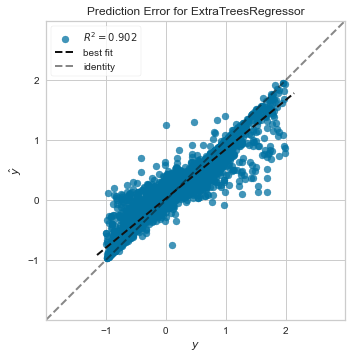

In [10]:
plot_model(et, plot = 'error')

In [11]:
final_et = finalize_model(et)

In [13]:
unseen_predictions = predict_model(final_et, data=df2_unseen)
unseen_predictions.describe()

,Fwd_Best_EPS_6M,Mkt_Cap,Best_EPS_1M,Best_EPS_3M,Best_EPS_6M,Best_EPS_1Y,Best_EPS_3Y,Best_EPS_5Y,Best_EPS_3M_v5Y,Best_EPS_6M_v5Y,...,ROE,ROE_1Y_Chg,ROE_SD,FCF_Mgn,FCF_Mgn_1Y_Chg,FCF_Mgn_SD,Op_Mgn,Op_Mgn_1Y_Chg,Op_Mgn_SD,Label
count,6654.000000,6.654000e+03,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,...,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000
mean,0.156908,3.875724e+04,0.132562,0.149807,0.142897,0.146926,0.174152,0.208195,0.665810,0.621051,...,21.331504,1.154440,13.290853,14.426650,0.549774,4.843307,19.478574,0.342164,2.382597,0.156019
std,0.353627,1.176074e+05,0.640763,0.411155,0.288691,0.227758,0.185546,0.233675,1.866974,1.229984,...,21.014836,30.697354,45.369288,15.094966,18.329883,13.104855,12.858883,4.133951,2.829568,0.317928
min,-0.997361,2.285343e+02,-2.993548,-1.904762,-0.975421,-0.809935,-0.279805,-0.160181,-7.686221,-3.993373,...,-33.754513,-1911.423912,0.152143,-186.066923,-682.186460,0.174305,-3.827139,-83.005348,0.040365,-0.963353
25%,-0.005642,4.028406e+03,0.000000,-0.009266,0.000000,0.036364,0.070813,0.085652,0.000000,0.000000,...,10.318431,-2.173408,2.019477,5.744892,-1.988453,1.691447,9.758385,-0.862376,0.863403,0.003783
50%,0.105586,1.067515e+04,0.000000,0.062500,0.103052,0.119548,0.142650,0.156667,0.227487,0.426198,...,14.922765,0.414229,3.903654,11.996881,0.571225,2.860838,16.903563,0.167769,1.611200,0.110988
75%,0.301870,2.740425e+04,0.065061,0.280367,0.265646,0.236261,0.243391,0.267468,1.296419,1.333373,...,25.974281,4.448067,8.307669,22.262243,3.319871,4.679770,26.384996,1.560313,2.978365,0.288409
max,1.978355,2.241304e+06,5.928058,3.904437,1.993151,1.970179,1.943333,1.987302,7.969040,3.995350,...,185.473309,184.928481,803.640188,192.327044,473.918884,268.681811,85.386440,43.631613,46.473281,1.960476


In [14]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.Fwd_Best_EPS_6M, unseen_predictions.Label, 'R2')

0.9332

# FWD RETURN 3M MODEL

In [17]:
from pycaret.regression import *

In [18]:
df3 = df.drop(columns=['Date', 'ticker', 'Fwd_Best_EPS_6M', 'Fwd_Return_3M_Class', 'Year'])
df3.describe()

,Fwd_Return_3M,Mkt_Cap,Best_EPS_1M,Best_EPS_3M,Best_EPS_6M,Best_EPS_1Y,Best_EPS_3Y,Best_EPS_5Y,Best_EPS_3M_v5Y,Best_EPS_6M_v5Y,...,ROIC_SD,ROE,ROE_1Y_Chg,ROE_SD,FCF_Mgn,FCF_Mgn_1Y_Chg,FCF_Mgn_SD,Op_Mgn,Op_Mgn_1Y_Chg,Op_Mgn_SD
count,66543.000000,6.654300e+04,66543.000000,66543.000000,66543.000000,66543.000000,66543.000000,66543.000000,66543.000000,66543.000000,...,66543.000000,66543.000000,66543.000000,66543.000000,66543.000000,66543.000000,66543.000000,66543.000000,66543.000000,66543.000000
mean,1.637086,3.963934e+04,0.134926,0.149239,0.142226,0.146950,0.175486,0.206988,0.655999,0.628822,...,4.363130,21.455667,0.485937,13.604074,14.862171,0.645832,5.215309,19.793758,0.321828,2.435875
std,12.781530,1.209661e+05,0.641078,0.408113,0.288412,0.225683,0.185265,0.227802,1.830792,1.224266,...,12.324927,20.696550,37.653509,46.717679,16.419273,21.480849,14.647090,13.151157,4.160568,3.073220
min,-70.666545,2.285343e+02,-2.993548,-1.969543,-0.998682,-0.901786,-0.315403,-0.192926,-7.963698,-3.993773,...,0.102878,-34.297030,-1911.423912,0.131123,-186.202847,-786.589581,0.171153,-3.827139,-83.005348,0.040187
25%,-6.283027,4.091980e+03,0.000000,-0.010204,0.000000,0.034915,0.073810,0.087458,0.000000,0.000000,...,1.394105,10.335427,-2.172367,1.977712,5.892424,-1.997974,1.693878,9.792099,-0.869289,0.853625
50%,1.236606,1.074958e+04,0.000000,0.060423,0.097981,0.119841,0.145540,0.158129,0.217910,0.420799,...,2.406145,14.893621,0.407125,3.818095,12.112964,0.596600,2.874146,17.111181,0.163065,1.617410
75%,8.728438,2.820864e+04,0.060302,0.271513,0.263307,0.235416,0.240492,0.266364,1.271802,1.333494,...,4.377073,26.106234,4.261422,8.287664,23.020334,3.405229,4.743748,26.899368,1.543946,3.045869
max,247.456219,2.317310e+06,5.985646,3.970370,1.993151,1.970179,1.985257,1.996078,7.994405,3.997175,...,267.476144,191.928086,184.928481,804.311314,192.327044,473.918884,315.433750,96.975075,67.269338,54.359769


In [19]:
df4 = df3.sample(frac=0.9, random_state=123)
df4_unseen = df3.drop(df4.index)

In [20]:
df4_unseen.describe()

,Fwd_Return_3M,Mkt_Cap,Best_EPS_1M,Best_EPS_3M,Best_EPS_6M,Best_EPS_1Y,Best_EPS_3Y,Best_EPS_5Y,Best_EPS_3M_v5Y,Best_EPS_6M_v5Y,...,ROIC_SD,ROE,ROE_1Y_Chg,ROE_SD,FCF_Mgn,FCF_Mgn_1Y_Chg,FCF_Mgn_SD,Op_Mgn,Op_Mgn_1Y_Chg,Op_Mgn_SD
count,6654.000000,6.654000e+03,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,...,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000
mean,1.797074,3.875724e+04,0.132562,0.149807,0.142897,0.146926,0.174152,0.208195,0.665810,0.621051,...,4.224374,21.331504,1.154440,13.290853,14.426650,0.549774,4.843307,19.478574,0.342164,2.382597
std,12.991172,1.176074e+05,0.640763,0.411155,0.288691,0.227758,0.185546,0.233675,1.866974,1.229984,...,10.458280,21.014836,30.697354,45.369288,15.094966,18.329883,13.104855,12.858883,4.133951,2.829568
min,-51.717819,2.285343e+02,-2.993548,-1.904762,-0.975421,-0.809935,-0.279805,-0.160181,-7.686221,-3.993373,...,0.107370,-33.754513,-1911.423912,0.152143,-186.066923,-682.186460,0.174305,-3.827139,-83.005348,0.040365
25%,-6.247265,4.028406e+03,0.000000,-0.009266,0.000000,0.036364,0.070813,0.085652,0.000000,0.000000,...,1.411137,10.318431,-2.173408,2.019477,5.744892,-1.988453,1.691447,9.758385,-0.862376,0.863403
50%,1.269203,1.067515e+04,0.000000,0.062500,0.103052,0.119548,0.142650,0.156667,0.227487,0.426198,...,2.413441,14.922765,0.414229,3.903654,11.996881,0.571225,2.860838,16.903563,0.167769,1.611200
75%,8.881718,2.740425e+04,0.065061,0.280367,0.265646,0.236261,0.243391,0.267468,1.296419,1.333373,...,4.429800,25.974281,4.448067,8.307669,22.262243,3.319871,4.679770,26.384996,1.560313,2.978365
max,92.043127,2.241304e+06,5.928058,3.904437,1.993151,1.970179,1.943333,1.987302,7.969040,3.995350,...,266.626684,185.473309,184.928481,803.640188,192.327044,473.918884,268.681811,85.386440,43.631613,46.473281


In [21]:
reg_experiment = setup(df4, target = 'Fwd_Return_3M', session_id=123, log_experiment=True, experiment_name='Fwd_Return_3M')

,Description,Value
0,session_id,123
1,Target,Fwd_Return_3M
2,Original Data,"(59889, 70)"
3,Missing Values,False
4,Numeric Features,61
5,Categorical Features,8
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(41922, 92)"


In [22]:
best_model = compare_models(fold=10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,3.7369,30.3233,5.5054,0.8151,0.6273,1.7594,31.3140
rf,Random Forest Regressor,4.1508,35.6696,5.9702,0.7826,0.6647,1.7449,97.8820
xgboost,Extreme Gradient Boosting,6.2613,68.8215,8.2941,0.5803,0.9355,2.7354,15.5750
catboost,CatBoost Regressor,6.2817,68.9550,8.3025,0.5795,0.9436,2.5033,17.4150
dt,Decision Tree Regressor,5.6314,76.4447,8.7395,0.5338,0.7638,3.3556,1.3770
lightgbm,Light Gradient Boosting Machine,7.7904,104.4331,10.2175,0.3633,1.2070,2.2288,0.5180
gbr,Gradient Boosting Regressor,9.0514,141.7101,11.9017,0.1361,1.4112,2.2357,31.6100
knn,K Neighbors Regressor,9.3705,158.3197,12.5810,0.0342,1.1319,3.7337,0.7450
ridge,Ridge Regression,9.4134,159.0994,12.6112,0.0303,1.3884,2.3956,0.0440
br,Bayesian Ridge,9.4144,159.2225,12.6161,0.0295,1.3956,2.4114,0.6570


In [23]:
et2 = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.7865,32.7921,5.7264,0.8001,0.6369,1.6847
1,3.6876,28.2363,5.3138,0.8232,0.6389,1.4991
2,3.6518,30.2762,5.5024,0.8106,0.6289,1.5571
3,3.7516,29.0646,5.3912,0.8189,0.6235,1.3031
4,3.7629,29.9520,5.4728,0.8246,0.6215,1.6704
5,3.7072,30.4750,5.5204,0.8171,0.6190,2.3796
6,3.7399,29.2088,5.4045,0.8073,0.6252,2.0669
7,3.6803,30.0606,5.4828,0.8153,0.6191,1.3883
8,3.7142,31.0955,5.5763,0.8184,0.6311,1.6095
9,3.8872,32.0714,5.6632,0.8154,0.6293,2.4351


In [24]:
evaluate_model(et2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

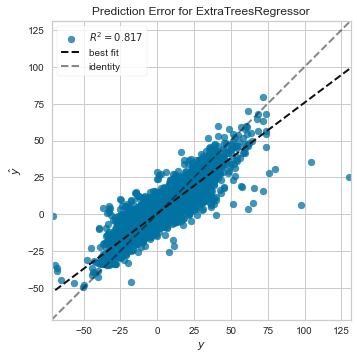

In [25]:
plot_model(et2, plot = 'error')

In [26]:
final_et2 = finalize_model(et2)

In [27]:
unseen_predictions2 = predict_model(final_et2, data=df4_unseen)
unseen_predictions2.head()

,Fwd_Return_3M,Mkt_Cap,Sector,Best_EPS_1M,Best_EPS_3M,Best_EPS_6M,Best_EPS_1Y,Best_EPS_3Y,Best_EPS_5Y,Best_EPS_3M_v5Y,...,ROE,ROE_1Y_Chg,ROE_SD,FCF_Mgn,FCF_Mgn_1Y_Chg,FCF_Mgn_SD,Op_Mgn,Op_Mgn_1Y_Chg,Op_Mgn_SD,Label
13,7.889653,151825.280,Information Technology,0.000000,-0.082645,0.034335,0.041758,0.063797,0.067042,-1.232724,...,17.421563,1.983926,1.629581,25.297954,1.863541,1.106574,26.800499,2.323705,1.823161,6.986764
17,-3.238475,276437.780,Financials,0.021097,0.017000,-0.030690,-0.026035,0.014391,0.087337,0.194648,...,11.176349,-1.830510,0.545397,15.776947,-18.938475,12.638319,38.313107,5.523560,4.623737,-4.079944
36,16.488885,72113.020,Consumer Discretionary,-0.000056,-0.227684,-0.089563,0.115366,0.187252,0.356380,-0.638879,...,22.937598,-8.358432,7.344076,34.485767,3.495085,1.796763,35.809464,0.727352,1.152032,12.487644
37,16.942239,17166.006,Information Technology,0.000000,0.695777,0.642412,0.346470,0.335781,0.641026,1.085412,...,16.622607,3.683007,9.040669,20.487220,4.909583,3.542451,20.295340,2.097034,5.417276,14.941505
41,1.548385,131404.080,Consumer Staples,0.000000,-0.046458,-0.019666,0.076320,0.088488,0.096516,-0.481347,...,181.661342,39.841631,33.083553,18.627502,-10.639229,3.777735,46.692867,1.762780,1.919456,2.848801


In [28]:
from pycaret.utils import check_metric
check_metric(unseen_predictions2.Fwd_Return_3M, unseen_predictions2.Label, 'R2')

0.8673

# FWD_RETURN_3M_CLASS MODEL

In [29]:
df5 = df.drop(columns=['Date', 'ticker', 'Fwd_Best_EPS_6M', 'Fwd_Return_3M', 'Year'])
df5.describe()

,Fwd_Return_3M_Class,Mkt_Cap,Best_EPS_1M,Best_EPS_3M,Best_EPS_6M,Best_EPS_1Y,Best_EPS_3Y,Best_EPS_5Y,Best_EPS_3M_v5Y,Best_EPS_6M_v5Y,...,ROIC_SD,ROE,ROE_1Y_Chg,ROE_SD,FCF_Mgn,FCF_Mgn_1Y_Chg,FCF_Mgn_SD,Op_Mgn,Op_Mgn_1Y_Chg,Op_Mgn_SD
count,66543.000000,6.654300e+04,66543.000000,66543.000000,66543.000000,66543.000000,66543.000000,66543.000000,66543.000000,66543.000000,...,66543.000000,66543.000000,66543.000000,66543.000000,66543.000000,66543.000000,66543.000000,66543.000000,66543.000000,66543.000000
mean,0.545136,3.963934e+04,0.134926,0.149239,0.142226,0.146950,0.175486,0.206988,0.655999,0.628822,...,4.363130,21.455667,0.485937,13.604074,14.862171,0.645832,5.215309,19.793758,0.321828,2.435875
std,0.497962,1.209661e+05,0.641078,0.408113,0.288412,0.225683,0.185265,0.227802,1.830792,1.224266,...,12.324927,20.696550,37.653509,46.717679,16.419273,21.480849,14.647090,13.151157,4.160568,3.073220
min,0.000000,2.285343e+02,-2.993548,-1.969543,-0.998682,-0.901786,-0.315403,-0.192926,-7.963698,-3.993773,...,0.102878,-34.297030,-1911.423912,0.131123,-186.202847,-786.589581,0.171153,-3.827139,-83.005348,0.040187
25%,0.000000,4.091980e+03,0.000000,-0.010204,0.000000,0.034915,0.073810,0.087458,0.000000,0.000000,...,1.394105,10.335427,-2.172367,1.977712,5.892424,-1.997974,1.693878,9.792099,-0.869289,0.853625
50%,1.000000,1.074958e+04,0.000000,0.060423,0.097981,0.119841,0.145540,0.158129,0.217910,0.420799,...,2.406145,14.893621,0.407125,3.818095,12.112964,0.596600,2.874146,17.111181,0.163065,1.617410
75%,1.000000,2.820864e+04,0.060302,0.271513,0.263307,0.235416,0.240492,0.266364,1.271802,1.333494,...,4.377073,26.106234,4.261422,8.287664,23.020334,3.405229,4.743748,26.899368,1.543946,3.045869
max,1.000000,2.317310e+06,5.985646,3.970370,1.993151,1.970179,1.985257,1.996078,7.994405,3.997175,...,267.476144,191.928086,184.928481,804.311314,192.327044,473.918884,315.433750,96.975075,67.269338,54.359769


In [30]:
df6 = df5.sample(frac=0.9, random_state=123)
df6_unseen = df5.drop(df6.index)

In [31]:
df6_unseen.describe()

,Fwd_Return_3M_Class,Mkt_Cap,Best_EPS_1M,Best_EPS_3M,Best_EPS_6M,Best_EPS_1Y,Best_EPS_3Y,Best_EPS_5Y,Best_EPS_3M_v5Y,Best_EPS_6M_v5Y,...,ROIC_SD,ROE,ROE_1Y_Chg,ROE_SD,FCF_Mgn,FCF_Mgn_1Y_Chg,FCF_Mgn_SD,Op_Mgn,Op_Mgn_1Y_Chg,Op_Mgn_SD
count,6654.000000,6.654000e+03,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,...,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000
mean,0.548242,3.875724e+04,0.132562,0.149807,0.142897,0.146926,0.174152,0.208195,0.665810,0.621051,...,4.224374,21.331504,1.154440,13.290853,14.426650,0.549774,4.843307,19.478574,0.342164,2.382597
std,0.497705,1.176074e+05,0.640763,0.411155,0.288691,0.227758,0.185546,0.233675,1.866974,1.229984,...,10.458280,21.014836,30.697354,45.369288,15.094966,18.329883,13.104855,12.858883,4.133951,2.829568
min,0.000000,2.285343e+02,-2.993548,-1.904762,-0.975421,-0.809935,-0.279805,-0.160181,-7.686221,-3.993373,...,0.107370,-33.754513,-1911.423912,0.152143,-186.066923,-682.186460,0.174305,-3.827139,-83.005348,0.040365
25%,0.000000,4.028406e+03,0.000000,-0.009266,0.000000,0.036364,0.070813,0.085652,0.000000,0.000000,...,1.411137,10.318431,-2.173408,2.019477,5.744892,-1.988453,1.691447,9.758385,-0.862376,0.863403
50%,1.000000,1.067515e+04,0.000000,0.062500,0.103052,0.119548,0.142650,0.156667,0.227487,0.426198,...,2.413441,14.922765,0.414229,3.903654,11.996881,0.571225,2.860838,16.903563,0.167769,1.611200
75%,1.000000,2.740425e+04,0.065061,0.280367,0.265646,0.236261,0.243391,0.267468,1.296419,1.333373,...,4.429800,25.974281,4.448067,8.307669,22.262243,3.319871,4.679770,26.384996,1.560313,2.978365
max,1.000000,2.241304e+06,5.928058,3.904437,1.993151,1.970179,1.943333,1.987302,7.969040,3.995350,...,266.626684,185.473309,184.928481,803.640188,192.327044,473.918884,268.681811,85.386440,43.631613,46.473281


In [32]:
from pycaret.classification import *

In [33]:
reg_experiment = setup(df6, target = 'Fwd_Return_3M_Class', session_id=123, log_experiment=True, experiment_name='Fwd_Return_3M_Class')

,Description,Value
0,session_id,123
1,Target,Fwd_Return_3M_Class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(59889, 70)"
5,Missing Values,False
6,Numeric Features,61
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [34]:
best_model = compare_models(fold=10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8717,0.9345,0.8918,0.8756,0.8836,0.7408,0.7409,8.4990
et,Extra Trees Classifier,0.8663,0.9274,0.8837,0.8730,0.8783,0.7299,0.7300,3.7590
catboost,CatBoost Classifier,0.8130,0.8886,0.8724,0.8023,0.8359,0.6194,0.6223,19.8740
xgboost,Extreme Gradient Boosting,0.8113,0.8857,0.8585,0.8081,0.8325,0.6170,0.6186,15.3830
dt,Decision Tree Classifier,0.8059,0.8041,0.8235,0.8215,0.8225,0.6083,0.6084,1.7870
lightgbm,Light Gradient Boosting Machine,0.7593,0.8393,0.8639,0.7393,0.7967,0.5060,0.5153,1.2790
gbc,Gradient Boosting Classifier,0.6376,0.6950,0.8536,0.6227,0.7201,0.2404,0.2656,32.0030
knn,K Neighbors Classifier,0.5921,0.6187,0.6637,0.6178,0.6399,0.1711,0.1717,0.6570
ada,Ada Boost Classifier,0.5851,0.6101,0.7479,0.5957,0.6631,0.1409,0.1473,6.1960
ridge,Ridge Classifier,0.5647,0.0000,0.7658,0.5763,0.6577,0.0917,0.0989,0.0930


In [35]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8793,0.9380,0.9074,0.8761,0.8915,0.7557,0.7563
1,0.8784,0.9365,0.8996,0.8803,0.8898,0.7541,0.7543
2,0.8748,0.9359,0.8969,0.8766,0.8866,0.7468,0.7470
3,0.8731,0.9315,0.8934,0.8766,0.8849,0.7435,0.7437
4,0.8717,0.9387,0.8903,0.8766,0.8834,0.7407,0.7408
5,0.8705,0.9340,0.8890,0.8756,0.8823,0.7383,0.7384
6,0.8707,0.9351,0.8960,0.8709,0.8833,0.7384,0.7388
7,0.8702,0.9322,0.8816,0.8808,0.8812,0.7382,0.7382
8,0.8700,0.9363,0.8873,0.8762,0.8817,0.7374,0.7375
9,0.8585,0.9268,0.8759,0.8665,0.8712,0.7143,0.7144


In [36]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

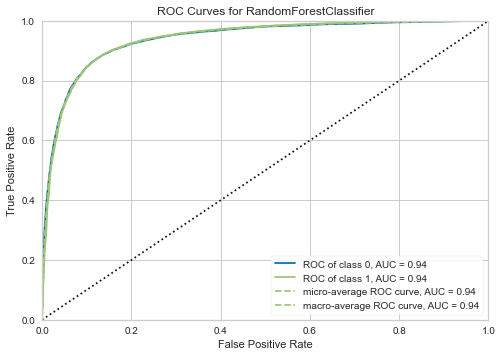

In [37]:
plot_model(rf)

In [38]:
final_rf = finalize_model(rf)

In [39]:
unseen_predictions3 = predict_model(final_rf, data=df6_unseen)
unseen_predictions3.head()

,Fwd_Return_3M_Class,Mkt_Cap,Sector,Best_EPS_1M,Best_EPS_3M,Best_EPS_6M,Best_EPS_1Y,Best_EPS_3Y,Best_EPS_5Y,Best_EPS_3M_v5Y,...,ROE_1Y_Chg,ROE_SD,FCF_Mgn,FCF_Mgn_1Y_Chg,FCF_Mgn_SD,Op_Mgn,Op_Mgn_1Y_Chg,Op_Mgn_SD,Label,Score
13,1,151825.280,Information Technology,0.000000,-0.082645,0.034335,0.041758,0.063797,0.067042,-1.232724,...,1.983926,1.629581,25.297954,1.863541,1.106574,26.800499,2.323705,1.823161,1,0.97
17,0,276437.780,Financials,0.021097,0.017000,-0.030690,-0.026035,0.014391,0.087337,0.194648,...,-1.830510,0.545397,15.776947,-18.938475,12.638319,38.313107,5.523560,4.623737,0,0.71
36,1,72113.020,Consumer Discretionary,-0.000056,-0.227684,-0.089563,0.115366,0.187252,0.356380,-0.638879,...,-8.358432,7.344076,34.485767,3.495085,1.796763,35.809464,0.727352,1.152032,1,0.83
37,1,17166.006,Information Technology,0.000000,0.695777,0.642412,0.346470,0.335781,0.641026,1.085412,...,3.683007,9.040669,20.487220,4.909583,3.542451,20.295340,2.097034,5.417276,1,0.79
41,1,131404.080,Consumer Staples,0.000000,-0.046458,-0.019666,0.076320,0.088488,0.096516,-0.481347,...,39.841631,33.083553,18.627502,-10.639229,3.777735,46.692867,1.762780,1.919456,1,0.81


In [40]:
from pycaret.utils import check_metric
check_metric(unseen_predictions3.Fwd_Return_3M_Class, unseen_predictions3.Label, 'Accuracy')

0.8879

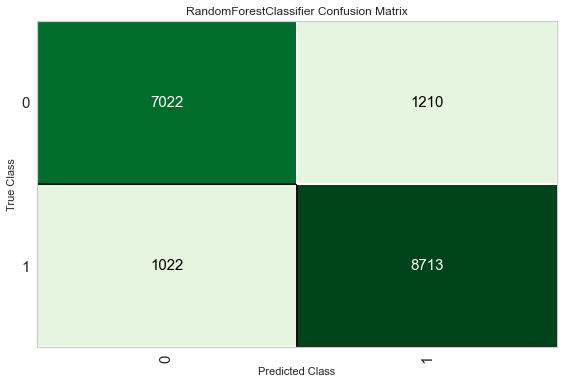

In [41]:
# plot model (without plot kwargs)
plot_model(rf, plot = 'confusion_matrix') 


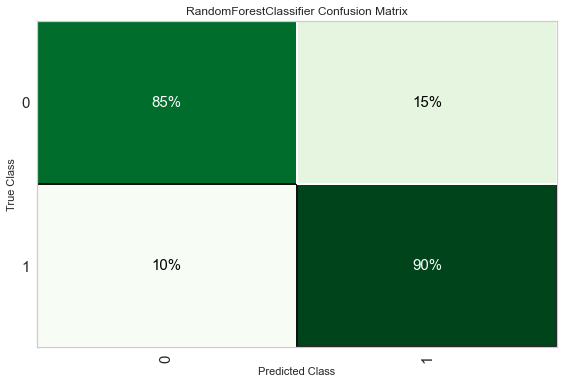

In [42]:
# plot model (with plot kwargs)
plot_model(rf, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})